In [1]:
import pandas as pd
import glob

In [2]:
import os.path

if (not os.path.exists("full-data.bin")):
    l = [pd.read_pickle(filename) for filename in glob.glob("data/chunk-*.bin")]
    df = pd.concat(l, axis=0)
    df.to_pickle('full-data.bin')
    
df = pd.read_pickle('full-data.bin')

In [3]:
import re

def normalizeCycle(raw):
    str1 = ''.join(str(e) for e in raw)    
    return re.sub(r'^(.+?)\1+$', r'\1', str1)        

for node in df.filter(regex="^cycle_.+(?<!norm)(?<!len)(?<!start)$").columns.values:
    print(node)
    df["%s_norm" %node] = df[node].apply(normalizeCycle, 1)


cycle_Actin_BR
cycle_Actin_ST
cycle_Arp2_3
cycle_CP
cycle_Cdc42
cycle_Cofilin
cycle_Coronin
cycle_Cortactin
cycle_Dia1
cycle_Dia2
cycle_Ena_Vasp
cycle_IRSp53
cycle_LIMK
cycle_PAK
cycle_PIP2
cycle_PKD
cycle_Profilin
cycle_ROCK
cycle_ROCK_
cycle_Rac1
cycle_RhoA
cycle_SSH
cycle_Thymosin
cycle_WASP
cycle_WAVE


cycle_Actin_BR_norm  cycle_Actin_ST_norm
1                    1                      4804
                     10                     1169
                     0                       703
                     1101                    688
                     1110                    515
                     1011                    392
1110                 1110                    350
1101                 1101                    256
1                    01                      134
0111                 0111                     94
1011                 1000                     87
1110                 1101                     78
1                    0111                     70
1101                 1011                     66
1110                 1                        64
1101                 10                       60
1001                 1000                     56
1101                 0100                     55
1100                 0100                     54
1101                 1      

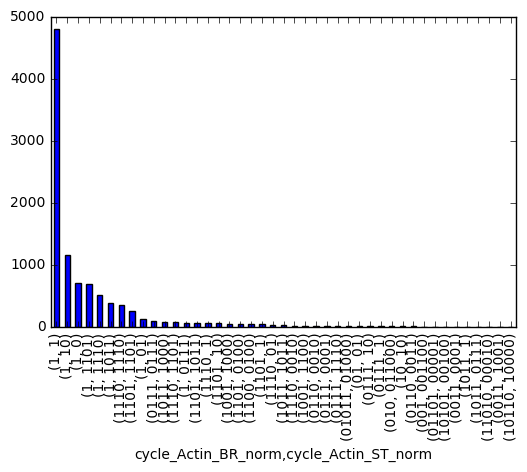

In [17]:
sr = df.groupby(by=["cycle_Actin_BR_norm","cycle_Actin_ST_norm"]).size().sort_values(ascending=False)
sr.plot(kind="bar");
sr

In [16]:
df.groupby(by=["cycle_RhoA_norm","cycle_Rac1_norm"]).size().sort_values(ascending=False)

cycle_RhoA_norm  cycle_Rac1_norm
1                0                  4419
0                1                   874
0110             0011                751
1100             0110                664
0111             0001                489
1101             0100                442
1110             0010                350
0100             0111                316
0011             1001                272
0110             0111                236
1011             1000                219
1000             1110                168
1100             1110                164
10               10                  161
0010             1011                141
01               01                  133
1001             1100                 58
0001             1101                 42
0011             1011                 40
1001             1101                 19
00010            11011                14
000111           110011               10
100011           111001                7
01000            01111  

In [96]:
df[df["init_Cdc42"] == 0].groupby(by=["cycle_Actin_BR_norm","cycle_Actin_ST_norm"]).size().sort_values(ascending=False)

cycle_Actin_BR_norm  cycle_Actin_ST_norm
1                    1                      10529
100                  001                     3984
001                  001                     3922
011                  011                     3860
110                  101                     3568
011                  1                       2977
101                  1                       2949
011                  110                     2583
                     010                     2260
101                  101                     1582
001011               10                      1507
010110               010                     1253
011                  0                       1174
001011               001                     1124
100101               100                      908
                     01                       787
101100               100                      760
101                  011                      586
010                  100                      547
110      